In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim


---
#### Data Preparation for CIFAR-10 Classification

---

This tutorial include the data pipeline for training and evaluating a neural network on the CIFAR-10 dataset. It performs the following key tasks:

1. **Data Preprocessing**: Standardizes and transforms the images into tensors suitable for model training.
   
2. **Batching**: Specifies the batch size for more efficient training and testing.
   
3. **Data Loading**: Downloads the CIFAR-10 dataset and prepares DataLoader objects for both the training and test datasets, enabling easy batch processing and shuffling.
   
4. **Class Labels**: Defines the classes present in the CIFAR-10 dataset for easier interpretation of model predictions later on.



In [2]:
#from ipywidgets import IProgress
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 256

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 86749565.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


---

#### Introduction to CIFAR-10 Image Dataset

---

The CIFAR-10 dataset is a widely-used resource for machine learning and computer vision research. It contains 60,000 32x32 color images, covering 10 different classes. The dataset is balanced, with each class having exactly 6,000 images. The classes include:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck



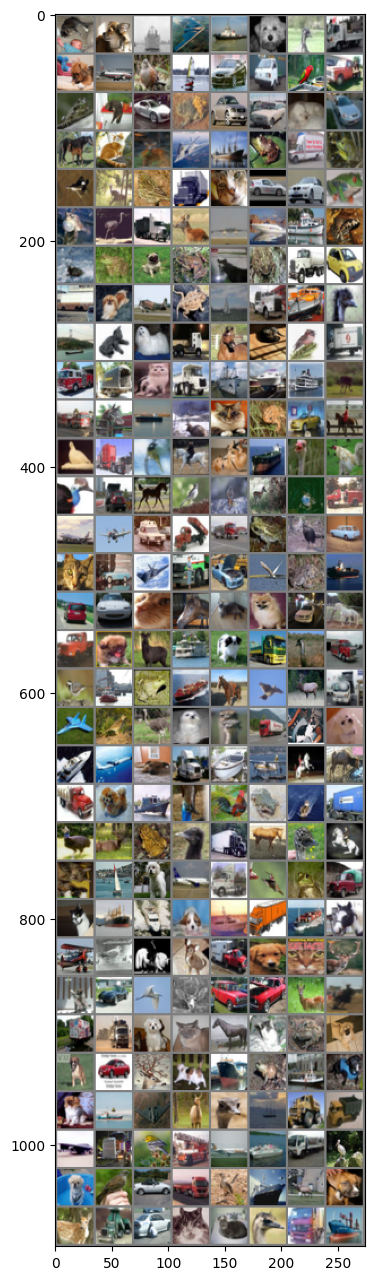

In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Use 'next()' instead of 'dataiter.next()'

f = plt.figure(figsize=(16, 16))

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

If the dataset is too heavy in your machine, please select the subset of the dataset, here I selected only 1000 training, and 200 testing images.

In [4]:
from torch.utils.data import Subset
import random

# Generate random indices for training and test set
train_indices = random.sample(range(len(trainset)), 1000)  # 1000 random indices for training
test_indices = random.sample(range(len(testset)), 200)    # 200 random indices for testing

# Create training and test subsets
trainset = Subset(trainset, train_indices)
testset = Subset(testset, test_indices)

# Create DataLoader
batch_size = 32  # You can change this value
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


  cat   dog  ship plane  ship   dog  bird truck   dog plane  bird  ship   car truck  bird truck  frog   cat   car  frog   car   car   dog   car horse   cat  deer plane  ship  frog truck  frog plane  deer  bird truck   cat   car   car  frog  frog  bird truck  deer plane  ship  ship  frog  deer  frog   dog  frog horse  frog truck   car truck   dog plane  frog  ship truck  ship  bird  ship   cat   dog truck horse   cat  bird truck truck truck   cat truck  ship  ship  ship  bird truck horse  ship  deer   cat  frog   car horse  bird truck  bird horse   dog  ship  bird  bird  bird truck horse  bird  bird  deer  frog truck plane plane   car truck truck  frog  bird   car   cat   car plane truck   car  bird  frog  ship   car   car   cat horse   cat   dog   car horse truck   dog  deer  ship   dog truck  bird truck  bird  ship  frog  ship horse  bird  deer truck plane  bird  bird   dog  bird truck   cat   dog  ship plane   dog truck  ship plane horse  deer truck   dog  ship  bird  bird  frog  shi

#### Batching in Training:

- Memory Efficiency: Fits manageable chunks of data into limited GPU/CPU memory.
- Computational Speed: Utilizes parallel processing and optimized libraries for faster operations.
Model Performance: Enhances generalization and acts as implicit regularization.
- Flexibility: Allows for adaptive learning rates and early stopping.

Batching improves training speed and model quality, especially on large datasets and limited computational resources.

In [5]:
# Jupyter Notebook cell to inspect the shape of batches
for i, (inputs, labels) in enumerate(trainloader):
    print(f"Batch {i+1}")
    print("Shape of inputs:", inputs.shape)  # Should show [batch_size, num_channels, height, width]
    print("Shape of labels:", labels.shape)  # Should show [batch_size]
    if i == 10:  # Stop after 3 batches for brevity
        break

for i, (inputs, labels) in enumerate(testloader):
    print(f"Test Batch {i+1}")
    print("Shape of inputs:", inputs.shape)
    print("Shape of labels:", labels.shape)
    if i == 2:
        break


Batch 1
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 2
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 3
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 4
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 5
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 6
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 7
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 8
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 9
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 10
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Batch 11
Shape of inputs: torch.Size([32, 3, 32, 32])
Shape of labels: torch.Size([32])
Test Batch 1
Shape of inputs: torch.Size(

### Model Structure: Net

1. **Input**: Takes RGB images of shape (3, H, W).
  
2. **Convolutional Layers**:
    - **conv1**: Convolutional layer with 3 input channels, 6 output channels, and a 5x5 kernel size.
    - **conv2**: Another convolutional layer with 6 input channels, 16 output channels, and a 5x5 kernel size.
  
3. **Pooling Layer**: Utilizes a 2x2 Max Pooling operation.
  
4. **Fully Connected Layers**:
    - **fc1**: A fully connected layer with 120 output units.
    - **fc2**: Another fully connected layer with 84 output units.
    - **fc3**: Final fully connected layer with 10 output units, suitable for the 10 classes in CIFAR-10.



In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x.to(device)
        return x

net = Net()

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
net = Net()

### We can visuliza the filters in the first convolutional layer, let's compare randomly initialized filters and the filters after the training

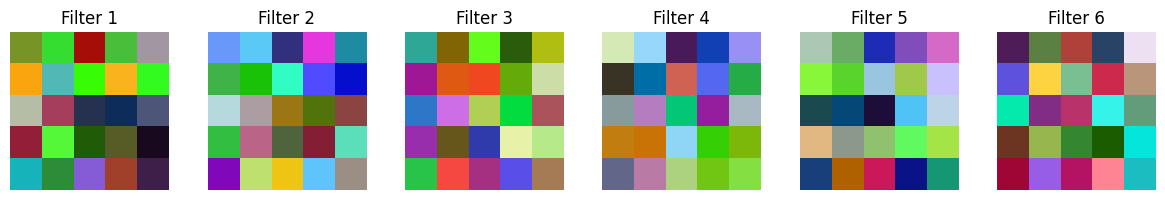

In [8]:

# Load the trained model for testing
# visual_net = Net()
# visual_net.load_state_dict(torch.load('trained_model.pth'))


visual_net = net


# Extract the weights (filters) of the first convolutional layer
conv1_weights = visual_net.conv1.weight.data.cpu().numpy()

# Normalize the filter weights to [0, 1]
conv1_weights_normalized = (conv1_weights - np.min(conv1_weights)) / (np.max(conv1_weights) - np.min(conv1_weights))

# Visualize all filters in the first convolutional layer
num_filters = conv1_weights_normalized.shape[0]

# Create a grid of subplots to display each filter
fig, axes = plt.subplots(1, num_filters, figsize=(12, 2))

for i in range(num_filters):
    filter_weights = conv1_weights_normalized[i]
    ax = axes[i]
    ax.imshow(np.transpose(filter_weights, (1, 2, 0)))
    ax.set_title(f"Filter {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


**Device Configuration**:
   - `device = 'cuda:0' if torch.cuda.is_available() else 'cpu'`: This line checks if a CUDA-compatible GPU is available. If yes, it sets the device to 'cuda:0' to leverage GPU acceleration; otherwise, it uses the CPU ('cpu') for computations.

In [9]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
net.to(device)
print (device)

cpu



**Loss Function and Optimizer**:
   - `criterion = nn.CrossEntropyLoss()`: Initializes the loss function, which is often used for classification tasks. In this case, it's Cross-Entropy Loss, suitable for multi-class classification.
   - `optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)`: Sets up the Stochastic Gradient Descent (SGD) optimizer for updating the model's parameters during training. It specifies a learning rate (lr) and momentum for optimization.



``` python
# Stochastic Gradient Descent (SGD) optimizer
optimizer_sgd = optim.SGD(params, lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False)

# Adam optimizer
optimizer_adam = optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

# Adagrad optimizer
optimizer_adagrad = optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0)

# RMSprop optimizer
optimizer_rmsprop = optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

# Adadelta optimizer
optimizer_adadelta = optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

# LBFGS optimizer
optimizer_lbfgs = optim.LBFGS(params, lr=1, max_iter=20, max_eval=None, tolerance_grad=1e-07,
                              tolerance_change=1e-09, history_size=100, line_search_fn=None)

# Loss Functions
# --------------

# Mean Squared Error (MSE) Loss
criterion_mse = nn.MSELoss()

# Cross-Entropy Loss
criterion_ce = nn.CrossEntropyLoss()

# Binary Cross-Entropy Loss (BCELoss)
criterion_bce = nn.BCELoss()

# Binary Cross-Entropy Loss with logits (BCEWithLogitsLoss)
criterion_bce_logits = nn.BCEWithLogitsLoss()

# Kullback-Leibler Divergence Loss (KLDivLoss)
criterion_kl = nn.KLDivLoss()

# Negative Log Likelihood Loss (NLLLoss)
criterion_nll = nn.NLLLoss()

# Poisson Negative Log Likelihood Loss (PoissonNLLLoss)
criterion_poisson_nll = nn.PoissonNLLLoss()

# Margin Ranking Loss (MarginRankingLoss)
criterion_margin_ranking = nn.MarginRankingLoss()

# Hinge Embedding Loss (HingeEmbeddingLoss)
criterion_hinge_embedding = nn.HingeEmbeddingLoss()

# Triplet Margin Loss (TripletMarginLoss)
criterion_triplet_margin = nn.TripletMarginLoss()

# Smooth L1 Loss (Huber Loss)
criterion_smooth_l1 = nn.SmoothL1Loss()
```




## Here I will select Cross Entropy loss and SGD optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
import time

# Initialize
start_time = time.time()

# Loop over epochs
for epoch in range(200):

    # Training
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Model Training part
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Collect training statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Print training metrics
    avg_train_loss = running_loss / len(trainloader)
    avg_train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss}, Training Accuracy: {avg_train_accuracy}%")

    # Testing  # we don't have to see the test accuracy like this way!!! Note that this is unseen data!!
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)

            # Collect test statistics
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Print test metrics
    avg_test_loss = running_test_loss / len(testloader)
    avg_test_accuracy = 100 * correct_test / total_test
    print(f"Epoch {epoch+1}, Test Loss: {avg_test_loss}, Test Accuracy: {avg_test_accuracy}%")

# Done
end_time = time.time()
print(f"Finished Training. Total time for training: {end_time - start_time:.2f} seconds")


Epoch 1, Training Loss: 2.3035911917686462, Training Accuracy: 9.9%
Epoch 1, Test Loss: 2.31404709815979, Test Accuracy: 11.5%
Epoch 2, Training Loss: 2.3016427978873253, Training Accuracy: 9.9%
Epoch 2, Test Loss: 2.3133464881352017, Test Accuracy: 11.5%
Epoch 3, Training Loss: 2.301470011472702, Training Accuracy: 9.9%
Epoch 3, Test Loss: 2.313373463494437, Test Accuracy: 11.5%
Epoch 4, Training Loss: 2.3007505610585213, Training Accuracy: 9.9%
Epoch 4, Test Loss: 2.312922784260341, Test Accuracy: 11.5%
Epoch 5, Training Loss: 2.2988304272294044, Training Accuracy: 9.9%
Epoch 5, Test Loss: 2.312788282121931, Test Accuracy: 11.5%
Epoch 6, Training Loss: 2.299206390976906, Training Accuracy: 9.9%
Epoch 6, Test Loss: 2.312717710222517, Test Accuracy: 11.5%
Epoch 7, Training Loss: 2.299990549683571, Training Accuracy: 9.7%
Epoch 7, Test Loss: 2.31255841255188, Test Accuracy: 11.5%
Epoch 8, Training Loss: 2.298223666846752, Training Accuracy: 9.9%
Epoch 8, Test Loss: 2.3120927470070973, T

In [12]:
# Save the trained model's parameters
torch.save(net.state_dict(), 'trained_model.pth')

In [13]:
#net = net.to('cpu')
net.to(device)
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to (device)
        labels = labels.to (device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 50.0 %
Accuracy for class car   is: 47.4 %
Accuracy for class bird  is: 33.3 %
Accuracy for class cat   is: 12.0 %
Accuracy for class deer  is: 28.6 %
Accuracy for class dog   is: 35.7 %
Accuracy for class frog  is: 46.2 %
Accuracy for class horse is: 53.8 %
Accuracy for class ship  is: 56.5 %
Accuracy for class truck is: 26.1 %


Randomly selected samples for class plane:


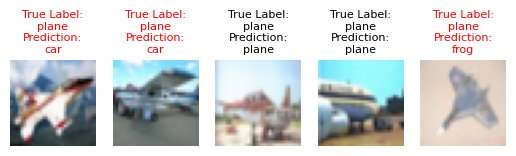

Randomly selected samples for class car:


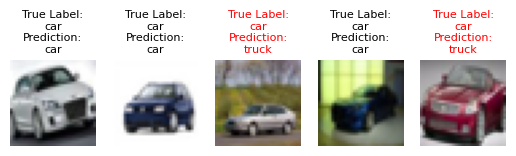

Randomly selected samples for class bird:


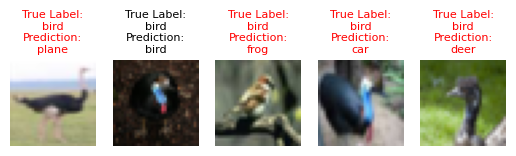

Randomly selected samples for class cat:


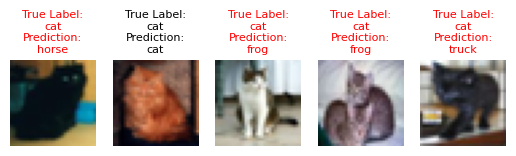

Randomly selected samples for class deer:


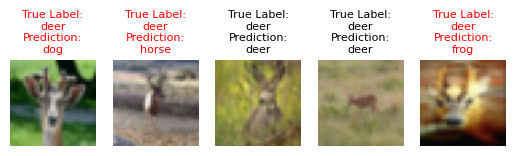

Randomly selected samples for class dog:


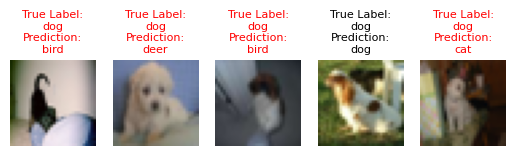

Randomly selected samples for class frog:


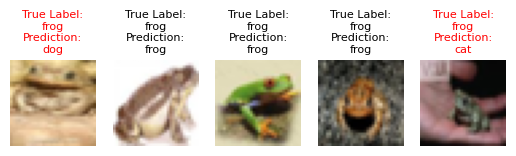

Randomly selected samples for class horse:


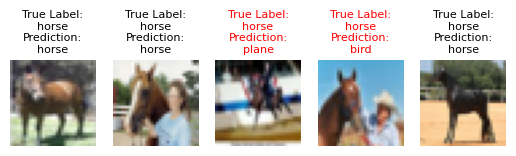

Randomly selected samples for class ship:


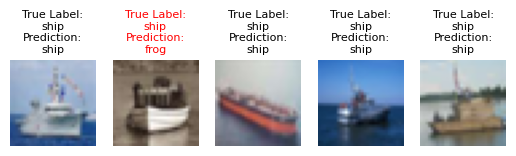

Randomly selected samples for class truck:


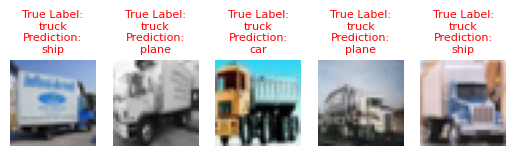

In [14]:
import random

# Load the trained model for testing
loaded_net = Net()
loaded_net.load_state_dict(torch.load('trained_model.pth'))
loaded_net.to(device)
loaded_net.eval()

# Create a dictionary to keep track of class indices
class_indices = {classname: [] for classname in classes}

# Find indices of images for each class
for i, data in enumerate(testset):
    _, label = data
    class_indices[classes[label]].append(i)

# Create a dictionary to store 5 randomly selected samples per class
random_samples = {classname: [] for classname in classes}

# Select 5 random images from each class
for classname, indices in class_indices.items():
    random_indices = random.sample(indices, 5)
    for i in random_indices:
        image, label = testset[i]
        image = image.to(device)
        output = loaded_net(image.unsqueeze(0))  # Make a prediction for a single image
        _, prediction = torch.max(output, 1)
        random_samples[classname].append((image, label, prediction.item()))

# Visualize random samples with highlighting for misclassified predictions
for classname, samples in random_samples.items():
    print(f"Randomly selected samples for class {classname}:")
    for i, (image, label, prediction) in enumerate(samples):
        plt.subplot(1, 5, i + 1)
        image = image.cpu().numpy().transpose(1, 2, 0) / 2 + 0.5
        plt.imshow(image)

        # Check if prediction is correct, if not, highlight in red
        if label != prediction:
            title_color = 'red'
        else:
            title_color = 'black'

        plt.title(f"True Label:\n{classes[label]}\nPrediction:\n{classes[prediction]}", fontsize=8, color=title_color)
        plt.axis('off')
    plt.show()


#### Task 1. Show the overfitting problem in the small set of the dataset: 100 accuracy on training, but lower accuracy in test dataset.

In [15]:
# In my opinion there is no need to create small set of data to show overfitting, it can be clearly seen from the procees above
# so I will write below code for printing training and test accuracy
print("Test Accuracy: ", avg_test_accuracy)
print("Training Accuracy: ", avg_train_accuracy)

Test Accuracy:  39.0
Training Accuracy:  100.0


#### Task 2. implement data augmentation techniques (e.g., random cropping, horizontal flipping) during training and thow if it helps on the overfitting problem.

In [16]:
# In this task I will use random cropping and horizontal flipping as showed in the example


transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

net_aug=Net()

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
net_aug.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_aug.parameters(), lr=0.001, momentum=0.9)

batch_size_augmented = 32

trainset_aug= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
train_indices = random.sample(range(len(trainset_aug)), 500)
trainset_aug = Subset(trainset_aug, train_indices)

trainloader_aug = torch.utils.data.DataLoader(trainset_aug, batch_size=batch_size_augmented, shuffle=True, num_workers=2)

start_time = time.time()

for epoch_aug in range(200):

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader_aug, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net_aug(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss_aug = running_loss / len(trainloader_aug)
    avg_train_accuracy_aug = 100 * correct_train / total_train
    print(f"Epoch {epoch_aug+1}, Training Loss: {avg_train_loss_aug}, Training Accuracy: {avg_train_accuracy_aug}%")

    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net_aug(images)
            loss = criterion(outputs, labels)

            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss_aug = running_test_loss / len(testloader)
    avg_test_accuracy_aug = 100 * correct_test / total_test
    print(f"Epoch {epoch_aug+1}, Test Loss: {avg_test_loss_aug}, Test Accuracy: {avg_test_accuracy_aug}%")

end_time = time.time()
print(f"Finished Training. Total time for training: {end_time - start_time:.2f} seconds")


Files already downloaded and verified
Epoch 1, Training Loss: 2.3028744757175446, Training Accuracy: 10.8%
Epoch 1, Test Loss: 2.3075035299573625, Test Accuracy: 11.0%
Epoch 2, Training Loss: 2.303197920322418, Training Accuracy: 10.8%
Epoch 2, Test Loss: 2.307583842958723, Test Accuracy: 11.0%
Epoch 3, Training Loss: 2.302626758813858, Training Accuracy: 10.8%
Epoch 3, Test Loss: 2.307608263833182, Test Accuracy: 11.0%
Epoch 4, Training Loss: 2.3017401099205017, Training Accuracy: 10.6%
Epoch 4, Test Loss: 2.3076748166765486, Test Accuracy: 11.0%
Epoch 5, Training Loss: 2.301162600517273, Training Accuracy: 11.0%
Epoch 5, Test Loss: 2.3077242033822194, Test Accuracy: 11.0%
Epoch 6, Training Loss: 2.300805851817131, Training Accuracy: 11.2%
Epoch 6, Test Loss: 2.307928596224104, Test Accuracy: 11.0%
Epoch 7, Training Loss: 2.300855830311775, Training Accuracy: 12.8%
Epoch 7, Test Loss: 2.3080595561436246, Test Accuracy: 11.5%
Epoch 8, Training Loss: 2.2997574359178543, Training Accurac

In [17]:
# After implementing augmentation techniques test accuracy becomes close to training accuracy, but training accuracy is not 100% anymore.
# Below the code for showing results after implementation of augmentation techniques:
print("Training Accuracy after augmentation: ", avg_train_accuracy_aug)
print("Test Accuracy after augmentation: ", avg_test_accuracy_aug)

Training Accuracy after augmentation:  40.4
Test Accuracy after augmentation:  27.0


#### Task 3. Visualiza all filters in the first convolutional layers.  

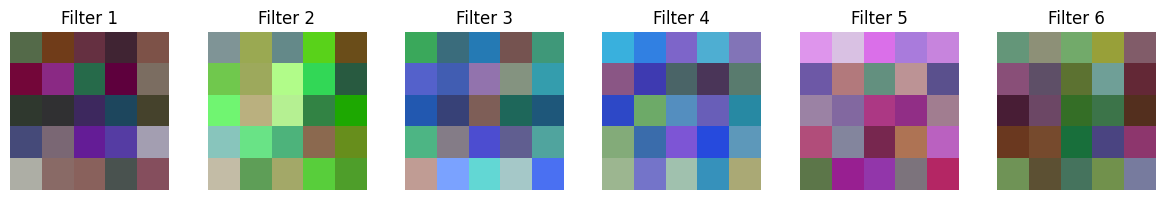

In [18]:
visual_net = net_aug

conv1_weights = visual_net.conv1.weight.data.cpu().numpy()

conv1_weights_normalized = (conv1_weights - np.min(conv1_weights)) / (np.max(conv1_weights) - np.min(conv1_weights))

num_filters = conv1_weights_normalized.shape[0]

fig, axes = plt.subplots(1, num_filters, figsize=(12, 2))

for i in range(num_filters):
    filter_weights = conv1_weights_normalized[i]
    ax = axes[i]
    ax.imshow(np.transpose(filter_weights, (1, 2, 0)))
    ax.set_title(f"Filter {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Task 4. create your own CNN model and compare its performance on large or small dataset (according to your machine)

In [19]:
class NewCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=32 * 5 * 5, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



my_cnn = NewCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_cnn.parameters(), lr=0.001, momentum=0.9)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
my_cnn.to(device)

batch_size_augmented = 32

trainset_aug= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
train_indices = random.sample(range(len(trainset_aug)), 500)
trainset_aug = Subset(trainset_aug, train_indices)

trainloader_aug = torch.utils.data.DataLoader(trainset_aug, batch_size=batch_size_augmented, shuffle=True, num_workers=2)

start_time = time.time()

for epoch_aug in range(200):

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader_aug, 0):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = my_cnn(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total_train += labels.size(0)
      correct_train += (predicted == labels).sum().item()

    avg_train_loss_aug = running_loss / len(trainloader_aug)
    avg_train_accuracy_aug = 100 * correct_train / total_train
    print(f"Epoch {epoch_aug+1}, Training Loss: {avg_train_loss_aug}, Training Accuracy: {avg_train_accuracy_aug}%")

# my_cnn.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = my_cnn(images)
        loss = criterion(outputs, labels)

        running_test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

    avg_test_loss_aug = running_test_loss / len(testloader)
    avg_test_accuracy_aug = 100 * correct_test / total_test
    print(f"Epoch {epoch_aug+1}, Test Loss: {avg_test_loss_aug}, Test Accuracy: {avg_test_accuracy_aug}%")

end_time = time.time()
print(f"Finished Training. Total time for training: {end_time - start_time:.2f} seconds")


Files already downloaded and verified
Epoch 1, Training Loss: 2.3021712601184845, Training Accuracy: 9.0%
Epoch 1, Test Loss: 2.3055639948163713, Test Accuracy: 9.0%
Epoch 2, Training Loss: 2.3018373548984528, Training Accuracy: 9.0%
Epoch 2, Test Loss: 2.3056319441114153, Test Accuracy: 10.0%
Epoch 3, Training Loss: 2.300580680370331, Training Accuracy: 8.8%
Epoch 3, Test Loss: 2.3056178774152483, Test Accuracy: 10.5%
Epoch 4, Training Loss: 2.299429401755333, Training Accuracy: 9.2%
Epoch 4, Test Loss: 2.3057262897491455, Test Accuracy: 10.5%
Epoch 5, Training Loss: 2.2988881021738052, Training Accuracy: 12.0%
Epoch 5, Test Loss: 2.3058162416730608, Test Accuracy: 13.5%
Epoch 6, Training Loss: 2.2975830137729645, Training Accuracy: 16.0%
Epoch 6, Test Loss: 2.305741855076381, Test Accuracy: 13.0%
Epoch 7, Training Loss: 2.2971373051404953, Training Accuracy: 15.0%
Epoch 7, Test Loss: 2.3057011536189487, Test Accuracy: 9.0%
Epoch 8, Training Loss: 2.2964469492435455, Training Accuracy

#### Task 5. Validate the test accuracy and training times with different loss function and optimazation algorithms. Report the best selections.  

In [20]:
my_cnn = NewCNN()
criterion_ce = nn.CrossEntropyLoss()
optimizer_adam = optim.Adam(my_cnn.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
my_cnn.to(device)

batch_size_augmented = 32

trainset_aug= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
train_indices = random.sample(range(len(trainset_aug)), 500)
trainset_aug = Subset(trainset_aug, train_indices)

trainloader_aug = torch.utils.data.DataLoader(trainset_aug, batch_size=batch_size_augmented, shuffle=True, num_workers=2)

start_time = time.time()

for epoch_aug in range(200):

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader_aug, 0):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer_adam.zero_grad()
      outputs = my_cnn(inputs)
      loss = criterion_ce(outputs, labels)
      loss.backward()
      optimizer_adam.step()

      running_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total_train += labels.size(0)
      correct_train += (predicted == labels).sum().item()

    avg_train_loss_aug = running_loss / len(trainloader_aug)
    avg_train_accuracy_aug = 100 * correct_train / total_train
    print(f"Epoch {epoch_aug+1}, Training Loss: {avg_train_loss_aug}, Training Accuracy: {avg_train_accuracy_aug}%")

    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = my_cnn(images)
        loss = criterion_ce(outputs, labels)

        running_test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

    avg_test_loss_aug = running_test_loss / len(testloader)
    avg_test_accuracy_aug = 100 * correct_test / total_test
    print(f"Epoch {epoch_aug+1}, Test Loss: {avg_test_loss_aug}, Test Accuracy: {avg_test_accuracy_aug}%")

end_time = time.time()
print(f"Finished Training. Total time for training: {end_time - start_time:.2f} seconds")


Files already downloaded and verified
Epoch 1, Training Loss: 2.2872926890850067, Training Accuracy: 13.8%
Epoch 1, Test Loss: 2.263082538332258, Test Accuracy: 19.0%
Epoch 2, Training Loss: 2.1943972408771515, Training Accuracy: 20.4%
Epoch 2, Test Loss: 2.216451815196446, Test Accuracy: 19.5%
Epoch 3, Training Loss: 2.117134526371956, Training Accuracy: 23.2%
Epoch 3, Test Loss: 2.123694045203073, Test Accuracy: 20.0%
Epoch 4, Training Loss: 2.0596886351704597, Training Accuracy: 23.2%
Epoch 4, Test Loss: 2.096712282725743, Test Accuracy: 22.0%
Epoch 5, Training Loss: 2.0064505115151405, Training Accuracy: 24.8%
Epoch 5, Test Loss: 2.049516575677054, Test Accuracy: 23.5%
Epoch 6, Training Loss: 1.93429833650589, Training Accuracy: 27.4%
Epoch 6, Test Loss: 2.066535711288452, Test Accuracy: 24.5%
Epoch 7, Training Loss: 1.9473291859030724, Training Accuracy: 25.0%
Epoch 7, Test Loss: 2.0011614731379916, Test Accuracy: 23.0%
Epoch 8, Training Loss: 1.8944060951471329, Training Accuracy

In [21]:
my_cnn = NewCNN()
criterion_ce = nn.CrossEntropyLoss()
optimizer_adadelta = optim.Adadelta(my_cnn.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
my_cnn.to(device)

batch_size_augmented = 32

trainset_aug= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
train_indices = random.sample(range(len(trainset_aug)), 500)
trainset_aug = Subset(trainset_aug, train_indices)

trainloader_aug = torch.utils.data.DataLoader(trainset_aug, batch_size=batch_size_augmented, shuffle=True, num_workers=2)

start_time = time.time()

for epoch_aug in range(200):

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader_aug, 0):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer_adadelta.zero_grad()
      outputs = my_cnn(inputs)
      loss = criterion_ce(outputs, labels)
      loss.backward()
      optimizer_adadelta.step()

      running_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total_train += labels.size(0)
      correct_train += (predicted == labels).sum().item()

    avg_train_loss_aug = running_loss / len(trainloader_aug)
    avg_train_accuracy_aug = 100 * correct_train / total_train
    print(f"Epoch {epoch_aug+1}, Training Loss: {avg_train_loss_aug}, Training Accuracy: {avg_train_accuracy_aug}%")

    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = my_cnn(images)
        loss = criterion_ce(outputs, labels)

        running_test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

    avg_test_loss_aug = running_test_loss / len(testloader)
    avg_test_accuracy_aug = 100 * correct_test / total_test
    print(f"Epoch {epoch_aug+1}, Test Loss: {avg_test_loss_aug}, Test Accuracy: {avg_test_accuracy_aug}%")

end_time = time.time()
print(f"Finished Training. Total time for training: {end_time - start_time:.2f} seconds")


Files already downloaded and verified
Epoch 1, Training Loss: 2.2823990881443024, Training Accuracy: 11.6%
Epoch 1, Test Loss: 2.2935257298605785, Test Accuracy: 14.0%
Epoch 2, Training Loss: 2.2028317749500275, Training Accuracy: 17.6%
Epoch 2, Test Loss: 2.1702469076429094, Test Accuracy: 16.5%
Epoch 3, Training Loss: 2.143920376896858, Training Accuracy: 21.4%
Epoch 3, Test Loss: 2.138838001659938, Test Accuracy: 20.0%
Epoch 4, Training Loss: 2.0634156987071037, Training Accuracy: 23.6%
Epoch 4, Test Loss: 2.095685124397278, Test Accuracy: 22.0%
Epoch 5, Training Loss: 2.028879292309284, Training Accuracy: 24.8%
Epoch 5, Test Loss: 2.0332165275301253, Test Accuracy: 22.0%
Epoch 6, Training Loss: 1.987105019390583, Training Accuracy: 23.8%
Epoch 6, Test Loss: 2.1085441453116283, Test Accuracy: 21.5%
Epoch 7, Training Loss: 2.0090406984090805, Training Accuracy: 23.8%
Epoch 7, Test Loss: 2.0864677940096175, Test Accuracy: 22.0%
Epoch 8, Training Loss: 1.9134148433804512, Training Accu

In [22]:
my_cnn = NewCNN()
criterion_ce = nn.CrossEntropyLoss()
optimizer_adagrad = optim.Adagrad(my_cnn.parameters(), lr=0.01, lr_decay=0, weight_decay=0)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
my_cnn.to(device)

batch_size_augmented = 32

trainset_aug= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
train_indices = random.sample(range(len(trainset_aug)), 500)
trainset_aug = Subset(trainset_aug, train_indices)

trainloader_aug = torch.utils.data.DataLoader(trainset_aug, batch_size=batch_size_augmented, shuffle=True, num_workers=2)

start_time = time.time()

for epoch_aug in range(200):

    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader_aug, 0):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer_adagrad.zero_grad()
      outputs = my_cnn(inputs)
      loss = criterion_ce(outputs, labels)
      loss.backward()
      optimizer_adagrad.step()

      running_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total_train += labels.size(0)
      correct_train += (predicted == labels).sum().item()

    avg_train_loss_aug = running_loss / len(trainloader_aug)
    avg_train_accuracy_aug = 100 * correct_train / total_train
    print(f"Epoch {epoch_aug+1}, Training Loss: {avg_train_loss_aug}, Training Accuracy: {avg_train_accuracy_aug}%")

    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = my_cnn(images)
        loss = criterion_ce(outputs, labels)

        running_test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

    avg_test_loss_aug = running_test_loss / len(testloader)
    avg_test_accuracy_aug = 100 * correct_test / total_test
    print(f"Epoch {epoch_aug+1}, Test Loss: {avg_test_loss_aug}, Test Accuracy: {avg_test_accuracy_aug}%")

end_time = time.time()
print(f"Finished Training. Total time for training: {end_time - start_time:.2f} seconds")


Files already downloaded and verified
Epoch 1, Training Loss: 2.378126010298729, Training Accuracy: 11.6%
Epoch 1, Test Loss: 2.2780067920684814, Test Accuracy: 13.0%
Epoch 2, Training Loss: 2.230339176952839, Training Accuracy: 15.6%
Epoch 2, Test Loss: 2.1847613539014543, Test Accuracy: 18.0%
Epoch 3, Training Loss: 2.1491795033216476, Training Accuracy: 19.2%
Epoch 3, Test Loss: 2.1115151814052036, Test Accuracy: 17.5%
Epoch 4, Training Loss: 2.098811849951744, Training Accuracy: 20.2%
Epoch 4, Test Loss: 2.075264607157026, Test Accuracy: 19.0%
Epoch 5, Training Loss: 2.081395275890827, Training Accuracy: 20.2%
Epoch 5, Test Loss: 2.055938022477286, Test Accuracy: 18.5%
Epoch 6, Training Loss: 2.020513616502285, Training Accuracy: 25.4%
Epoch 6, Test Loss: 2.0068346772875105, Test Accuracy: 29.5%
Epoch 7, Training Loss: 1.9937248155474663, Training Accuracy: 25.4%
Epoch 7, Test Loss: 2.027480125427246, Test Accuracy: 27.5%
Epoch 8, Training Loss: 1.9469207003712654, Training Accurac

In [ ]:
# In task 5 I've tried a lot of loss functions, among all of functions I found that Cross-Entropy Loss is the best. A lot of loss functions was not working.
# There is one more loss function that works - NLLLoss. But Cross-Entropy Loss works better than that loss function.
# Also, I tried to use different optimizers and selected 3 best working optimizers.
# I wrote code with 3 different optimizers in order to show the difference and show the best result.
# From the results above, clearly can be seen that Adadelta is the best optimizer in my case.